In [253]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [254]:
original_waypoints = np.loadtxt('traj_raceline_0.5margin.csv', delimiter=',')
lobby_map = cv2.imread('../map/lobby_refine.png', cv2.IMREAD_GRAYSCALE)


In [255]:
resolution = 0.05
origin = [-14.3, -4.94]

In [256]:
segment_points = [
    # x, y, vel, lookahead, p, d
    [-5.96, 0.515, 3.0, 0.5, 0.3, 0.1],
    [-4.5, -0.3, 7.0, 1.0, 0.3, 0.1],
    [2.24, -0.24, 5.0, 0.8, 0.3, 0.1],
    [4.15, 2.6, 2.0, 0.5, 0.3, 0.1], # haripin 1
    [2.0, 4.0, 3.0, 0.5, 0.3, 0.1],
    [0.74, 2.84, 5.0, 1.5, 0.3, 0.1],
    [-4.95, 2.74, 2.0, 0.5, 0.3, 0.1] # hairpin 2
    ]
segment_points = np.array(segment_points)

In [257]:
np.unique(lobby_map)

array([  0,   1,   2,   3,   4,   5,   6,   7,  10,  12,  15,  19,  22,
        27,  32,  37, 182, 204, 205, 206, 207, 208, 209, 210, 211, 213,
       215, 254], dtype=uint8)

In [258]:
# blackpts[:, 0]

(-10.644999647140503,
 5.745000982284546,
 -2.0899999022483824,
 8.909999835491181)

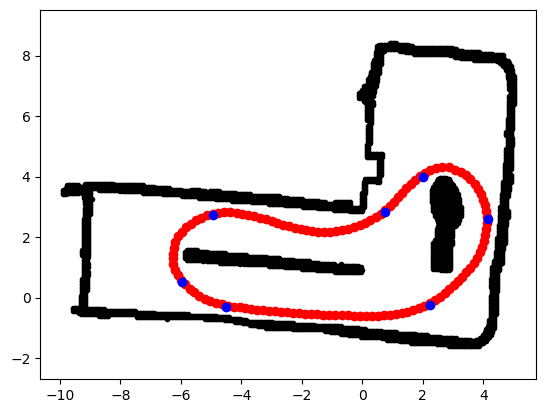

In [259]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')
plt.plot(original_waypoints[:,0], original_waypoints[:,1], 'ro')
plt.plot(segment_points[:,0], segment_points[:,1], 'bo')
plt.axis('equal')

In [260]:
np.any(lobby_map == 254, axis=1).shape

(320,)

(-6.79271381, 4.671081610000001, -0.843559895, 4.569095595)

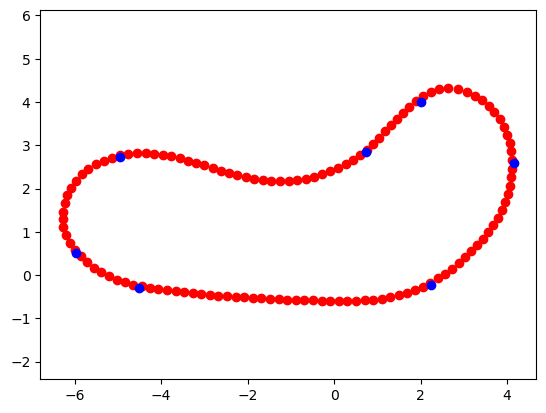

In [261]:
plt.plot(original_waypoints[:,0], original_waypoints[:,1], 'ro')
plt.plot(segment_points[:,0], segment_points[:,1], 'bo')
plt.axis('equal')

In [262]:
seg_start_idx = []
for i in range(segment_points.shape[0]):
    point = segment_points[i, :2]
    dist = np.linalg.norm(original_waypoints[:,:2] - point, axis=1)
    idx = np.argmin(dist)
    seg_start_idx.append(idx)
print(seg_start_idx)

[57, 66, 100, 118, 4, 12, 42]


In [268]:
seg_waypoints = np.zeros((original_waypoints.shape[0], 8))
seg_waypoints[:, :3] = original_waypoints[:, :3]
seg_start_idx.append(seg_start_idx[0])
for i in range(len(seg_start_idx)-1):
    if seg_start_idx[i] > seg_start_idx[i+1]:
        for j in range(seg_start_idx[i], original_waypoints.shape[0]):
            seg_waypoints[j, 3:7] = segment_points[i, 2:]
            seg_waypoints[j, 7] = i
        for j in range(seg_start_idx[i+1]):
            seg_waypoints[j, 3:7] = segment_points[0, 2:]
            seg_waypoints[j, 7] = i
    else:
        for j in range(seg_start_idx[i], seg_start_idx[i+1]):
            seg_waypoints[j, 3:7] = segment_points[i, 2:]
            seg_waypoints[j, 7] = i

In [269]:
np.savetxt('traj_raceline_0.5margin_seg.csv', seg_waypoints, delimiter=',', fmt='%.3f')

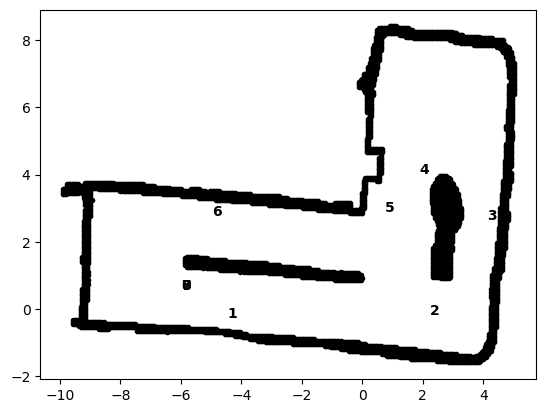

In [270]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
colors = ['ro', 'bo', 'go', 'yo']
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')
for i in range(len(seg_start_idx)-1):
    plt.plot(seg_waypoints[np.where(seg_waypoints[:,6] == i),0], seg_waypoints[np.where(seg_waypoints[:,6] == i),1], colors[i%4])
    plt.text(seg_waypoints[seg_start_idx[i], 0], seg_waypoints[seg_start_idx[i], 1], str(i), fontweight='bold')

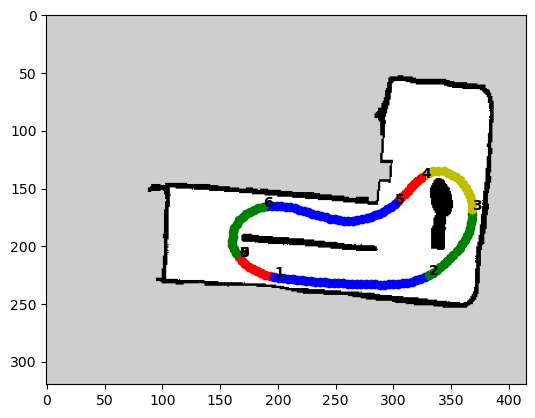

In [272]:
colors = ['ro', 'bo', 'go', 'yo']
plt.imshow(lobby_map, cmap='gray')
# plt.scatter((0-origin[0])/resolution, lobby_map.shape[0] - (0-origin[1])/resolution, c='r')
# plt.plot((seg_waypoints[:,0] - origin[0])/ resolution , lobby_map.shape[0]-(seg_waypoints[:,1] - origin[1]) / resolution , 'ro')
for i in range(len(seg_start_idx)-1):
    plt.plot((seg_waypoints[np.where(seg_waypoints[:,7] == i),0] - origin[0])/resolution, lobby_map.shape[0] - (seg_waypoints[np.where(seg_waypoints[:,7] == i),1] - origin[1]) /resolution, colors[i%4])
    plt.text((seg_waypoints[seg_start_idx[i], 0] - origin[0]) / resolution, lobby_map.shape[0] - (seg_waypoints[seg_start_idx[i], 1] - origin[1]) / resolution, str(i), fontweight='bold')